In [3]:
# importing the important libary
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt


c:\Users\RISHI\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# fetch the data from yahoo finance
import yfinance as yf
import pandas as pd
import datetime as dt

# Define the ticker symbol and date range
ticker_symbol = "AAPL"
start_date = "2018-01-01"
end_date = dt.datetime.now()

# Download historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create a Pandas DataFrame
df = pd.DataFrame(data)


[*********************100%%**********************]  1 of 1 completed


In [5]:
df=df.reset_index()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615879,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797447,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261932,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108681,82271200
...,...,...,...,...,...,...,...
1630,2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
1631,2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
1632,2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
1633,2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615879,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797447,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261932,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108681,82271200


In [8]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,42.540001,43.075001,42.314999,43.064999,102223600
1,43.132500,43.637501,42.990002,43.057499,118071600
2,43.134998,43.367500,43.020000,43.257500,89738400
3,43.360001,43.842499,43.262501,43.750000,94640000
4,43.587502,43.902500,43.482498,43.587502,82271200


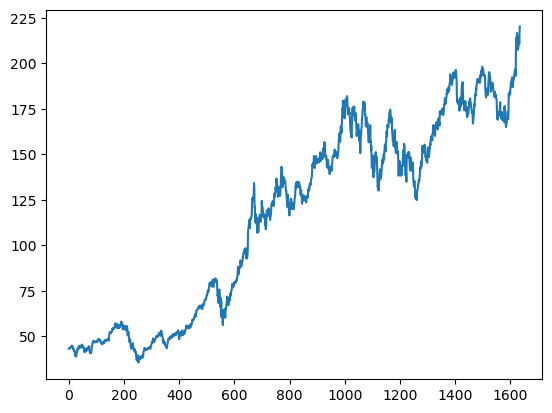

In [9]:
plt.plot(df.Close)

In [10]:
#using rolling function to find thr mean of before of 100 values
ma100= df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1630    182.8645
1631    183.1470
1632    183.3764
1633    183.6509
1634    183.9595
Name: Close, Length: 1635, dtype: float64

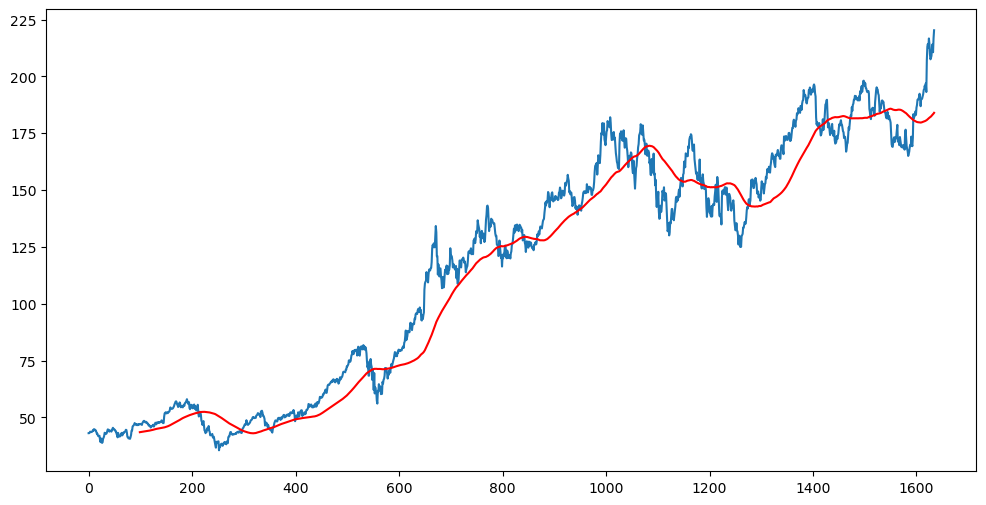

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
#using rolling function to find thr mean of before of 100 values
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1630    183.35055
1631    183.52425
1632    183.69585
1633    183.90855
1634    184.13120
Name: Close, Length: 1635, dtype: float64

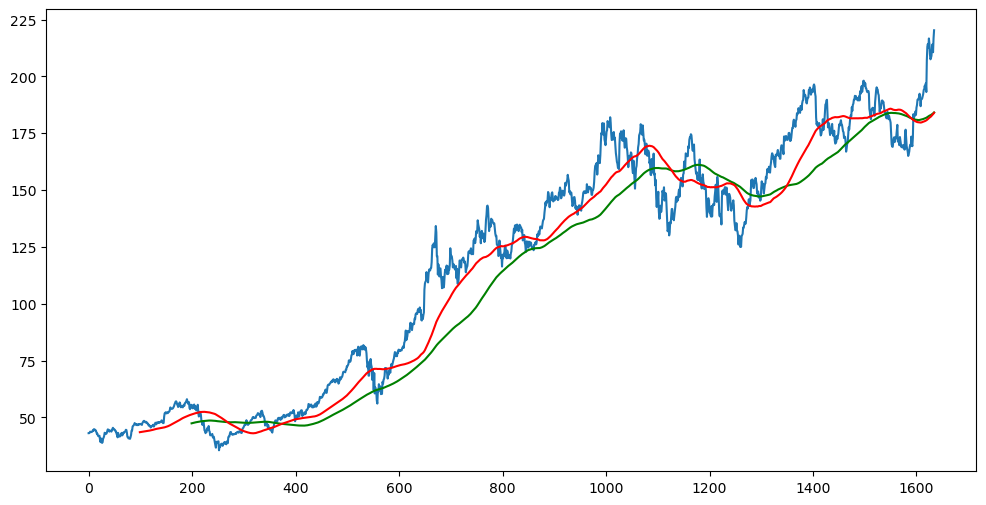

In [13]:
# Moving average graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [14]:
df.shape

(1635, 5)

In [15]:
#Splitting the data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training)
print(data_testing)

           Close
0      43.064999
1      43.057499
2      43.257500
3      43.750000
4      43.587502
...          ...
1139  145.490005
1140  148.470001
1141  150.169998
1142  147.070007
1143  151.000000

[1144 rows x 1 columns]
           Close
1144  153.039993
1145  155.350006
1146  154.089996
1147  152.949997
1148  151.600006
...          ...
1630  213.250000
1631  214.100006
1632  210.619995
1633  216.750000
1634  220.270004

[491 rows x 1 columns]


In [16]:
data_training.head()

,Close
0,43.064999
1,43.057499
2,43.257500
3,43.750000
4,43.587502


In [17]:
data_testing.head()

,Close
1144,153.039993
1145,155.350006
1146,154.089996
1147,152.949997
1148,151.600006


In [18]:
#Now to convert training data into range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [19]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.78260649],
       [0.76144072],
       [0.78827348]])

In [20]:
data_training_array.shape

(1144, 1)

In [21]:
# Now dividing the data in xtrain and ytrain
x_train= []
y_train = []


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [22]:
x_train.shape

(1044, 100, 1)

In [23]:
#LSTM model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=(x_train.shape[1],1))) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.2)) 

model.add(LSTM(units=60, activation='relu', return_sequences=True)) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.3)) 

model.add(LSTM(units=80, activation='relu', return_sequences=True)) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.4)) 

model.add(LSTM(units=120, activation='relu')) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.5)) 

model.add(Dense(units=1))


c:\Users\RISHI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 386ms/step - loss: 0.1612
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - loss: 0.0277
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - loss: 0.0119
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - loss: 0.0122
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - loss: 0.0092
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0096
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - loss: 0.0099
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0088
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - loss: 0.0077
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - loss: 0.0072
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - loss: 0.0076
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0076
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 0.0068
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - loss: 0.0060
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - 

In [27]:
model.save('my_model.keras')

In [28]:
data_testing.head()

,Close
1144,153.039993
1145,155.350006
1146,154.089996
1147,152.949997
1148,151.600006


In [29]:
past_100_days  = data_training.tail(100)

In [30]:
past_100_days

,Close
1044,162.740005
1045,164.850006
1046,165.119995
1047,163.199997
1048,166.559998
...,...
1139,145.490005
1140,148.470001
1141,150.169998
1142,147.070007


In [31]:
data_testing

,Close
1144,153.039993
1145,155.350006
1146,154.089996
1147,152.949997
1148,151.600006
...,...
1630,213.250000
1631,214.100006
1632,210.619995
1633,216.750000


In [32]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [33]:
final_df.head()

,Close
0,162.740005
1,164.850006
2,165.119995
3,163.199997
4,166.559998


In [34]:
input_data = scaler.fit_transform(final_df)

In [35]:
input_data

array([[3.96010560e-01],
       [4.18162795e-01],
       [4.20997326e-01],
       [4.00839866e-01],
       [4.36115460e-01],
       [4.32650874e-01],
       [4.00524918e-01],
       [3.59895052e-01],
       [3.40367488e-01],
       [3.98215194e-01],
       [3.51706089e-01],
       [3.11915976e-01],
       [2.68766367e-01],
       [3.15695510e-01],
       [3.62939600e-01],
       [3.73753235e-01],
       [4.09028829e-01],
       [4.23727087e-01],
       [4.59842595e-01],
       [4.74435763e-01],
       [5.14960701e-01],
       [5.21784783e-01],
       [5.31023679e-01],
       [5.66299273e-01],
       [5.53805810e-01],
       [5.20629921e-01],
       [5.17480283e-01],
       [5.60839911e-01],
       [5.25354298e-01],
       [4.91443585e-01],
       [4.94698152e-01],
       [4.73175812e-01],
       [4.27611550e-01],
       [4.47664080e-01],
       [4.76430379e-01],
       [4.22782083e-01],
       [4.20472519e-01],
       [4.44934319e-01],
       [4.43149561e-01],
       [4.34645650e-01],


In [36]:
input_data.shape

(591, 1)

In [37]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [38]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(491, 100, 1)
(491,)


In [39]:
#making predictions

y_predicted = model.predict(x_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step


In [40]:
y_predicted.shape

(491, 1)

In [41]:
y_test

array([2.94173170e-01, 3.18425271e-01, 3.05196823e-01, 2.93228326e-01,
       2.79055195e-01, 3.33543245e-01, 3.39422644e-01, 3.93595747e-01,
       3.83097060e-01, 3.67349030e-01, 4.31601102e-01, 4.28241445e-01,
       4.23412139e-01, 4.18372654e-01, 4.18897620e-01, 4.64252024e-01,
       4.56378009e-01, 4.94278275e-01, 5.05721805e-01, 5.04041977e-01,
       5.20000026e-01, 5.15800455e-01, 4.88189017e-01, 4.46719236e-01,
       4.43149561e-01, 4.46299199e-01, 4.72545916e-01, 4.05249295e-01,
       3.81732339e-01, 3.55800570e-01, 3.38057764e-01, 3.45826850e-01,
       3.23254577e-01, 3.09816271e-01, 3.24829476e-01, 3.09081446e-01,
       3.39632503e-01, 4.03254519e-01, 3.02572151e-01, 3.18005233e-01,
       2.87139069e-01, 2.69606281e-01, 3.09291304e-01, 3.34698107e-01,
       3.01312360e-01, 2.91023692e-01, 2.66771591e-01, 2.70341266e-01,
       2.80734863e-01, 2.60577404e-01, 1.83307062e-01, 1.38372696e-01,
       1.82992115e-01, 2.21312418e-01, 2.24461895e-01, 2.14278156e-01,
      

In [42]:
y_predicted


array([[0.1899076 ],
       [0.20022981],
       [0.21173766],
       [0.22457616],
       [0.23831001],
       [0.2520488 ],
       [0.26535875],
       [0.27811736],
       [0.29056767],
       [0.302522  ],
       [0.31387135],
       [0.32473898],
       [0.33529994],
       [0.34566087],
       [0.3557821 ],
       [0.3656016 ],
       [0.37521297],
       [0.38467476],
       [0.394148  ],
       [0.403681  ],
       [0.41324955],
       [0.42285442],
       [0.4324012 ],
       [0.44155833],
       [0.44983277],
       [0.45679507],
       [0.46219072],
       [0.46610326],
       [0.4683962 ],
       [0.4689537 ],
       [0.4677366 ],
       [0.46480998],
       [0.46040466],
       [0.4547791 ],
       [0.44785044],
       [0.43867612],
       [0.42681527],
       [0.41274977],
       [0.39801195],
       [0.38328972],
       [0.36908066],
       [0.35548913],
       [0.34233832],
       [0.329727  ],
       [0.3181209 ],
       [0.30778345],
       [0.29874372],
       [0.290

In [43]:
scaler.scale_

array([0.01049869])

In [44]:
scale_factor = 1/0.01090156
y_predicted= scale_factor*y_predicted
y_test=scale_factor*y_test

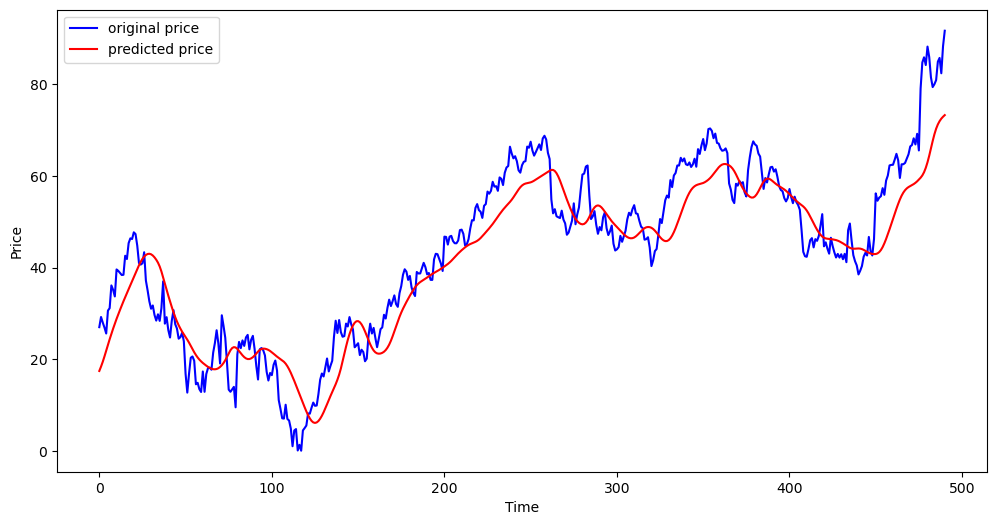

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()